In [27]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import pickle
import warnings
warnings.filterwarnings('ignore')

In [28]:
df=pd.read_csv('water.csv')

In [29]:
df

,ph,Hardness,Solids,Chloramines,Sulfate,Conductivity,Organic_carbon,Trihalomethanes,Turbidity,Potability,Crops
0,NaN,204.890456,20791.31898,7.300212,368.516441,564.308654,10.379783,86.990970,2.963135,0,rice
1,3.716080,129.422921,18630.05786,6.635246,NaN,592.885359,15.180013,56.329076,4.500656,0,rice
2,8.099124,224.236259,19909.54173,9.275884,NaN,418.606213,16.868637,66.420093,3.055934,0,rice
3,8.316766,214.373394,22018.41744,8.059332,356.886136,363.266516,18.436525,100.341674,4.628771,0,rice
4,9.092223,181.101509,17978.98634,6.546600,310.135738,398.410813,11.558279,31.997993,4.075075,0,rice
...,...,...,...,...,...,...,...,...,...,...,...
3271,4.668102,193.681736,47580.99160,7.166639,359.948574,526.424171,13.894419,66.687695,4.435821,1,cotton
3272,7.808856,193.553212,17329.80216,8.061362,NaN,392.449580,19.903225,NaN,2.798243,1,Mirchi
3273,9.419510,175.762646,33155.57822,7.350233,NaN,432.044783,11.039070,69.845400,3.298875,1,cotton
3274,5.126763,230.603758,11983.86938,6.303357,NaN,402.883113,11.168946,77.488213,4.708658,1,cotton


In [30]:
df.head()

,ph,Hardness,Solids,Chloramines,Sulfate,Conductivity,Organic_carbon,Trihalomethanes,Turbidity,Potability,Crops
0,NaN,204.890456,20791.31898,7.300212,368.516441,564.308654,10.379783,86.990970,2.963135,0,rice
1,3.716080,129.422921,18630.05786,6.635246,NaN,592.885359,15.180013,56.329076,4.500656,0,rice
2,8.099124,224.236259,19909.54173,9.275884,NaN,418.606213,16.868637,66.420093,3.055934,0,rice
3,8.316766,214.373394,22018.41744,8.059332,356.886136,363.266516,18.436525,100.341674,4.628771,0,rice
4,9.092223,181.101509,17978.98634,6.546600,310.135738,398.410813,11.558279,31.997993,4.075075,0,rice


In [31]:
df.tail()

,ph,Hardness,Solids,Chloramines,Sulfate,Conductivity,Organic_carbon,Trihalomethanes,Turbidity,Potability,Crops
3271,4.668102,193.681736,47580.99160,7.166639,359.948574,526.424171,13.894419,66.687695,4.435821,1,cotton
3272,7.808856,193.553212,17329.80216,8.061362,NaN,392.449580,19.903225,NaN,2.798243,1,Mirchi
3273,9.419510,175.762646,33155.57822,7.350233,NaN,432.044783,11.039070,69.845400,3.298875,1,cotton
3274,5.126763,230.603758,11983.86938,6.303357,NaN,402.883113,11.168946,77.488213,4.708658,1,cotton
3275,7.874671,195.102299,17404.17706,7.509306,NaN,327.459761,16.140368,78.698446,2.309149,1,wheat


In [32]:
df.describe()

,ph,Hardness,Solids,Chloramines,Sulfate,Conductivity,Organic_carbon,Trihalomethanes,Turbidity,Potability
count,2785.000000,3276.000000,3276.000000,3276.000000,2495.000000,3276.000000,3276.000000,3114.000000,3276.000000,3276.000000
mean,7.080795,196.369496,22014.092526,7.122277,333.775777,426.205111,14.284970,66.396293,3.966786,0.390110
std,1.594320,32.879761,8768.570828,1.583085,41.416840,80.824064,3.308162,16.175008,0.780382,0.487849
min,0.000000,47.432000,320.942611,0.352000,129.000000,181.483754,2.200000,0.738000,1.450000,0.000000
25%,6.093092,176.850538,15666.690300,6.127421,307.699498,365.734414,12.065801,55.844536,3.439711,0.000000
50%,7.036752,196.967627,20927.833605,7.130299,333.073546,421.884968,14.218338,66.622485,3.955028,0.000000
75%,8.062066,216.667456,27332.762125,8.114887,359.950170,481.792305,16.557652,77.337473,4.500320,1.000000
max,14.000000,323.124000,61227.196010,13.127000,481.030642,753.342620,28.300000,124.000000,6.739000,1.000000


In [33]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3276 entries, 0 to 3275
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   ph               2785 non-null   float64
 1   Hardness         3276 non-null   float64
 2   Solids           3276 non-null   float64
 3   Chloramines      3276 non-null   float64
 4   Sulfate          2495 non-null   float64
 5   Conductivity     3276 non-null   float64
 6   Organic_carbon   3276 non-null   float64
 7   Trihalomethanes  3114 non-null   float64
 8   Turbidity        3276 non-null   float64
 9   Potability       3276 non-null   int64  
 10  Crops            3276 non-null   object 
dtypes: float64(9), int64(1), object(1)
memory usage: 281.7+ KB


In [34]:
df.isnull().sum()

ph                 491
Hardness             0
Solids               0
Chloramines          0
Sulfate            781
Conductivity         0
Organic_carbon       0
Trihalomethanes    162
Turbidity            0
Potability           0
Crops                0
dtype: int64

In [35]:
data=df.dropna()

In [36]:
data

,ph,Hardness,Solids,Chloramines,Sulfate,Conductivity,Organic_carbon,Trihalomethanes,Turbidity,Potability,Crops
3,8.316766,214.373394,22018.41744,8.059332,356.886136,363.266516,18.436525,100.341674,4.628771,0,rice
4,9.092223,181.101509,17978.98634,6.546600,310.135738,398.410813,11.558279,31.997993,4.075075,0,rice
5,5.584087,188.313324,28748.68774,7.544869,326.678363,280.467916,8.399735,54.917862,2.559708,0,rice
6,10.223862,248.071735,28749.71654,7.513408,393.663395,283.651634,13.789695,84.603556,2.672989,0,rice
7,8.635849,203.361523,13672.09176,4.563009,303.309771,474.607645,12.363817,62.798309,4.401425,0,rice
...,...,...,...,...,...,...,...,...,...,...,...
3267,8.989900,215.047358,15921.41202,6.297312,312.931021,390.410231,9.899115,55.069304,4.613843,1,cotton
3268,6.702547,207.321086,17246.92035,7.708117,304.510230,329.266002,16.217303,28.878601,3.442983,1,Mirchi
3269,11.491011,94.812545,37188.82602,9.263166,258.930600,439.893618,16.172755,41.558501,4.369264,1,cotton
3270,6.069616,186.659040,26138.78019,7.747547,345.700257,415.886955,12.067620,60.419921,3.669712,1,cotton


In [37]:
data.isnull().sum()

ph                 0
Hardness           0
Solids             0
Chloramines        0
Sulfate            0
Conductivity       0
Organic_carbon     0
Trihalomethanes    0
Turbidity          0
Potability         0
Crops              0
dtype: int64

In [38]:
data.drop('Turbidity', axis=1, inplace=True)

# Display the modified DataFrame
print(data)

             ph    Hardness       Solids  Chloramines     Sulfate  \
3      8.316766  214.373394  22018.41744     8.059332  356.886136   
4      9.092223  181.101509  17978.98634     6.546600  310.135738   
5      5.584087  188.313324  28748.68774     7.544869  326.678363   
6     10.223862  248.071735  28749.71654     7.513408  393.663395   
7      8.635849  203.361523  13672.09176     4.563009  303.309771   
...         ...         ...          ...          ...         ...   
3267   8.989900  215.047358  15921.41202     6.297312  312.931021   
3268   6.702547  207.321086  17246.92035     7.708117  304.510230   
3269  11.491011   94.812545  37188.82602     9.263166  258.930600   
3270   6.069616  186.659040  26138.78019     7.747547  345.700257   
3271   4.668102  193.681736  47580.99160     7.166639  359.948574   

      Conductivity  Organic_carbon  Trihalomethanes  Potability   Crops  
3       363.266516       18.436525       100.341674           0    rice  
4       398.410813     

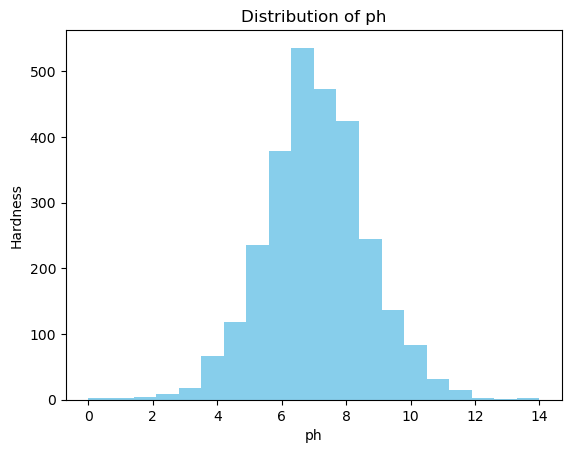

In [39]:
plt.hist(df['ph'], bins=20, color='skyblue')
plt.title('Distribution of ph')
plt.xlabel('ph')
plt.ylabel('Hardness')
plt.show()

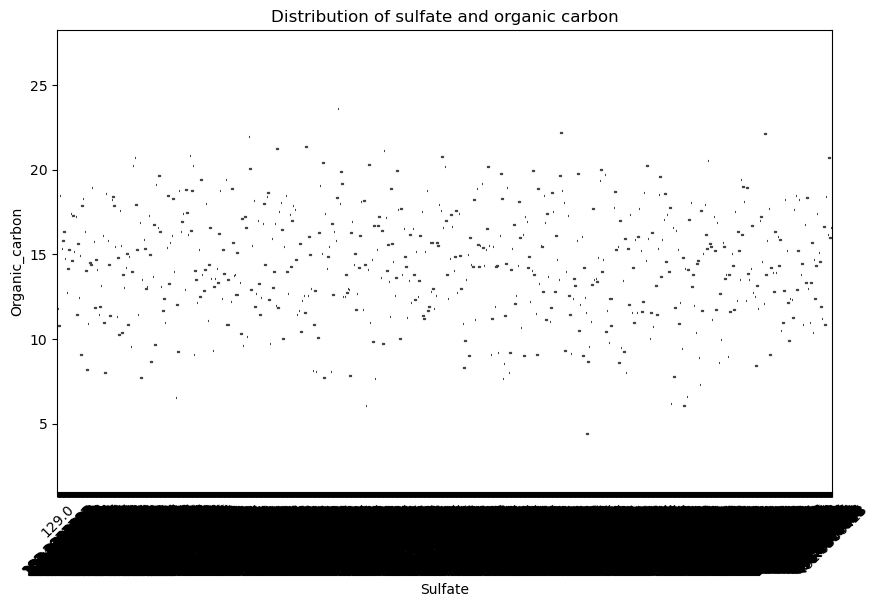

In [40]:
plt.figure(figsize=(10, 6))
sns.boxplot(x='Sulfate', y='Organic_carbon', data=df)
plt.title('Distribution of sulfate and organic carbon')
plt.xticks(rotation=45)
plt.show()

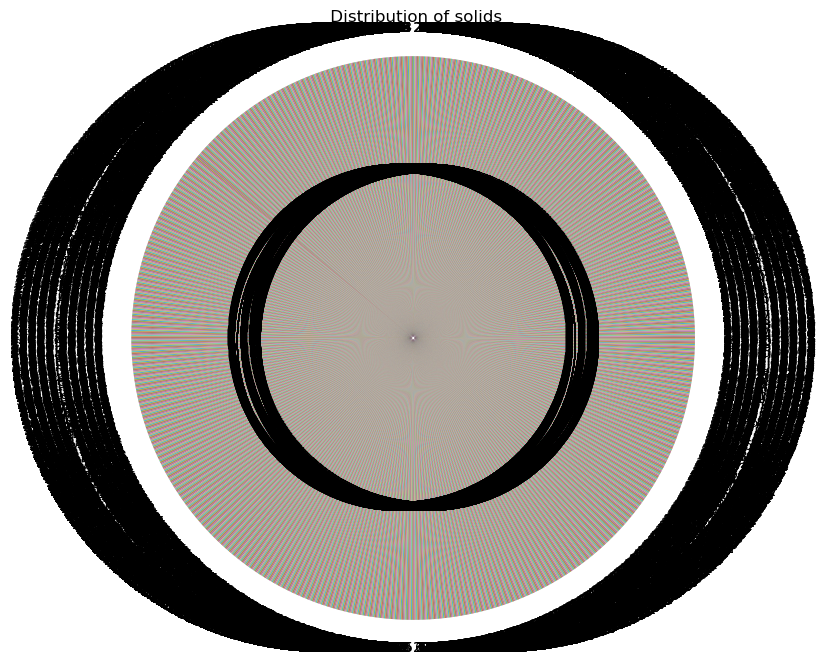

In [41]:
subscription_counts = df['Solids'].value_counts()
plt.figure(figsize=(8, 8))
plt.pie(subscription_counts, labels=subscription_counts.index, autopct='%1.1f%%', startangle=140)
plt.title(' Distribution of solids')
plt.axis('equal')
plt.show()

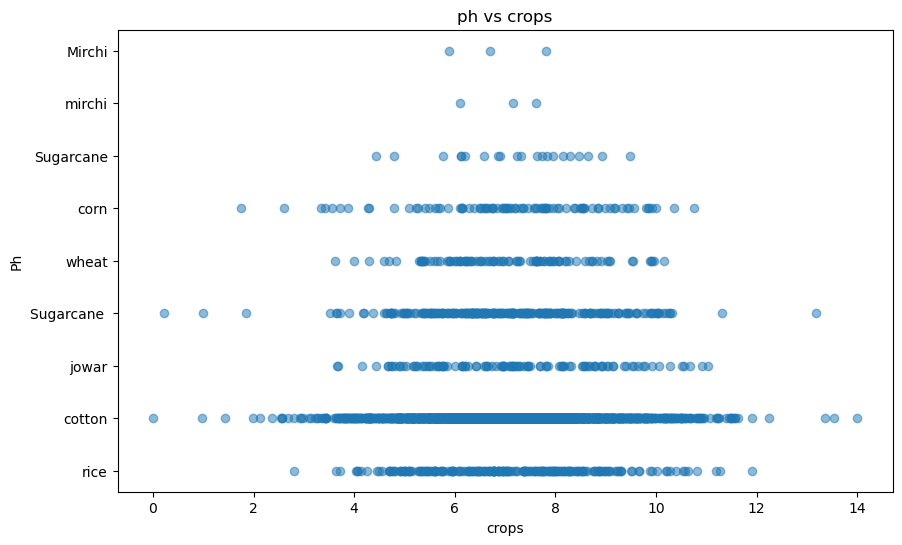

In [42]:
plt.figure(figsize=(10, 6))
plt.scatter(df['ph'], df['Crops'], alpha=0.5)
plt.title('ph vs crops')
plt.xlabel('crops')
plt.ylabel('Ph')
plt.show()

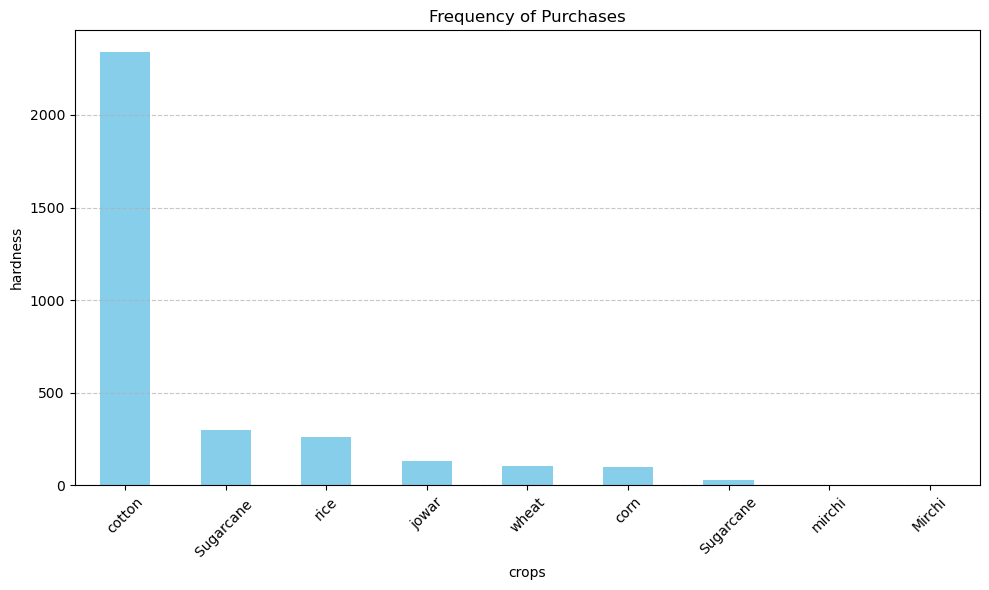

In [43]:
# Count the frequency of purchases
crops = df['Crops'].value_counts()

# Plotting the bar chart
plt.figure(figsize=(10, 6))
crops.plot(kind='bar', color='skyblue')
plt.title('Frequency of Purchases')
plt.xlabel('crops')
plt.ylabel('hardness')
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

In [44]:
from sklearn.preprocessing import LabelEncoder
label_encoder = LabelEncoder()
categorical_columns = ['Crops']
for col in categorical_columns:
    df[col] = label_encoder.fit_transform(df[col])

In [45]:
from sklearn.model_selection import train_test_split


X = df.drop(columns=['Crops']) 
y = df['Crops']


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [46]:
X

,ph,Hardness,Solids,Chloramines,Sulfate,Conductivity,Organic_carbon,Trihalomethanes,Turbidity,Potability
0,NaN,204.890456,20791.31898,7.300212,368.516441,564.308654,10.379783,86.990970,2.963135,0
1,3.716080,129.422921,18630.05786,6.635246,NaN,592.885359,15.180013,56.329076,4.500656,0
2,8.099124,224.236259,19909.54173,9.275884,NaN,418.606213,16.868637,66.420093,3.055934,0
3,8.316766,214.373394,22018.41744,8.059332,356.886136,363.266516,18.436525,100.341674,4.628771,0
4,9.092223,181.101509,17978.98634,6.546600,310.135738,398.410813,11.558279,31.997993,4.075075,0
...,...,...,...,...,...,...,...,...,...,...
3271,4.668102,193.681736,47580.99160,7.166639,359.948574,526.424171,13.894419,66.687695,4.435821,1
3272,7.808856,193.553212,17329.80216,8.061362,NaN,392.449580,19.903225,NaN,2.798243,1
3273,9.419510,175.762646,33155.57822,7.350233,NaN,432.044783,11.039070,69.845400,3.298875,1
3274,5.126763,230.603758,11983.86938,6.303357,NaN,402.883113,11.168946,77.488213,4.708658,1


In [47]:
y

0       7
1       7
2       7
3       7
4       7
       ..
3271    4
3272    0
3273    4
3274    4
3275    8
Name: Crops, Length: 3276, dtype: int32

In [48]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.impute import SimpleImputer
from sklearn.datasets import make_classification
import numpy as np

# Generate sample data with NaN values
X, y = make_classification(n_samples=4000, n_features=20, random_state=100)

# Introduce some NaN values
X_with_nan = X.copy()
nan_indices = np.column_stack((np.random.randint(0, X.shape[0], 200), np.random.randint(0, X.shape[1], 200)))
X_with_nan[nan_indices[:, 0], nan_indices[:, 1]] = np.nan

# Split data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X_with_nan, y, test_size=0.20, random_state=100)

# Initialize SimpleImputer to handle missing values
imputer = SimpleImputer(strategy='mean')

# Impute missing values in training and test sets
X_train_imputed = imputer.fit_transform(X_train)
X_test_imputed = imputer.transform(X_test)

# Initialize Logistic Regression classifier
logistic = LogisticRegression(random_state=100)

# Train the model on the imputed training data
logistic.fit(X_train_imputed, y_train)

# Make predictions on the imputed test data
y_pred = logistic.predict(X_test_imputed)

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)


Accuracy: 0.93375


In [49]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report
from sklearn.impute import SimpleImputer

# Initialize SimpleImputer to handle missing values
imputer = SimpleImputer(strategy='mean')

# Impute missing values in the training and test sets
X_train_imputed = imputer.fit_transform(X_train)
X_test_imputed = imputer.transform(X_test)

# Initialize RandomForestClassifier
random_forest = RandomForestClassifier()

# Train the model
random_forest.fit(X_train_imputed, y_train)

# Make predictions
y_pred = random_forest.predict(X_test_imputed)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

# Display classification report
print(classification_report(y_test, y_pred))



Accuracy: 0.98
              precision    recall  f1-score   support

           0       0.99      0.97      0.98       401
           1       0.97      0.99      0.98       399

    accuracy                           0.98       800
   macro avg       0.98      0.98      0.98       800
weighted avg       0.98      0.98      0.98       800



In [50]:
from sklearn.ensemble import AdaBoostClassifier
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

# Generate sample data
X, y = make_classification(n_samples=3000, n_features=20, random_state=100)

# Split data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=100)

# Initialize AdaBoost classifier
adaboost_classifier = AdaBoostClassifier(n_estimators=50, random_state=100)

# Train the model
adaboost_classifier.fit(X_train, y_train)

# Make predictions
y_pred = adaboost_classifier.predict(X_test)

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)


Accuracy: 0.92


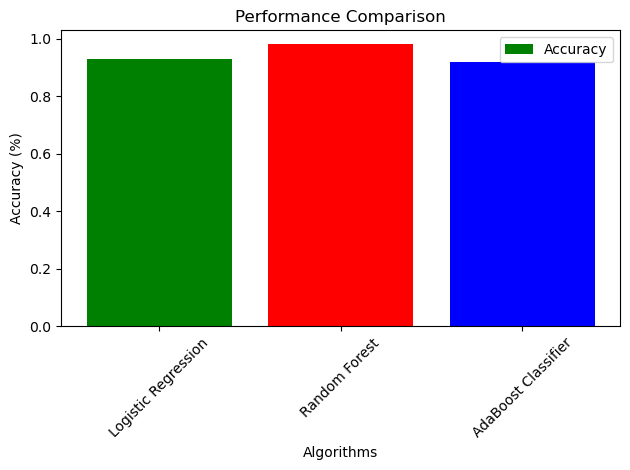

In [51]:
from matplotlib import pyplot as plt

  
left = [1, 2, 3] 
  
 
height = [0.93, 0.98, 0.92] 
  
 
tick_label = ['Logistic Regression', 'Random Forest', 'AdaBoost Classifier'] 
  
 
colors = ['green', 'red', 'blue']

 
plt.bar(left, height, tick_label=tick_label, color=colors, width=0.8) 
  

plt.xlabel('Algorithms') 

plt.ylabel('Accuracy (%)') 
 
plt.title('Performance Comparison') 


plt.xticks(rotation=45)

plt.legend(['Accuracy'], loc='upper right')

 
plt.tight_layout()  
plt.show()
